In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px


In [10]:
dataset = read_csv("hour.csv")

In [11]:
dataset['dteday'] = pd.to_datetime(dataset['dteday'])
dataset['day_of_year'] = dataset['dteday'].dt.dayofyear
dataset['day_of_week'] = dataset['dteday'].dt.dayofweek


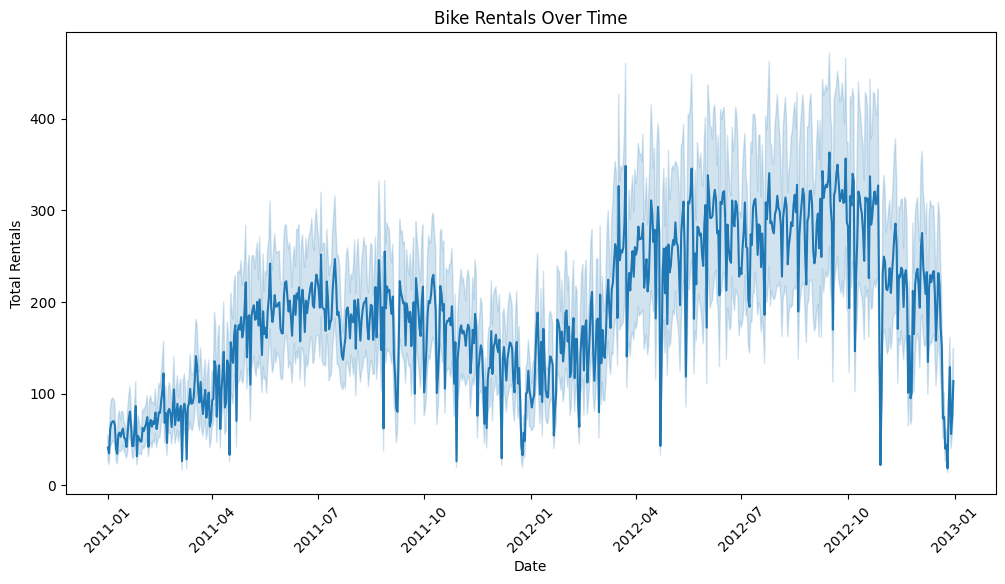

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x=dataset['dteday'], y=dataset['cnt'])
plt.title("Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)
plt.show()


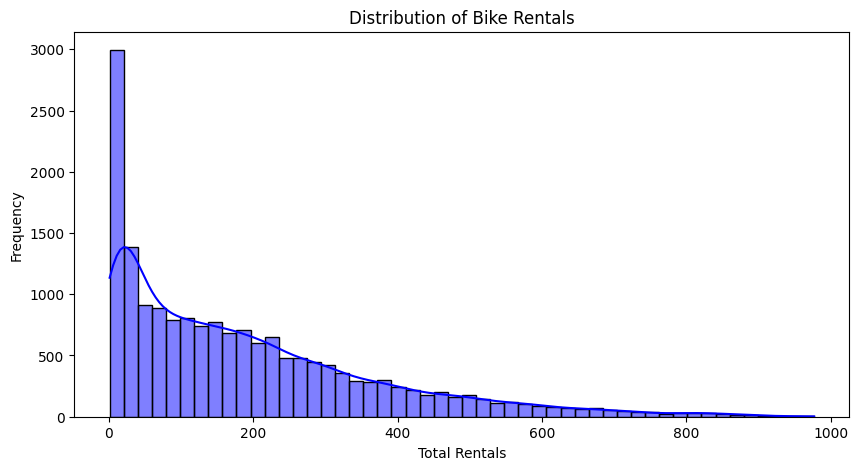

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(dataset['cnt'], bins=50, kde=True, color='blue')
plt.title("Distribution of Bike Rentals")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.show()

<ipython-input-14-650ef50cf0e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['season'], y=dataset['cnt'], palette='coolwarm')


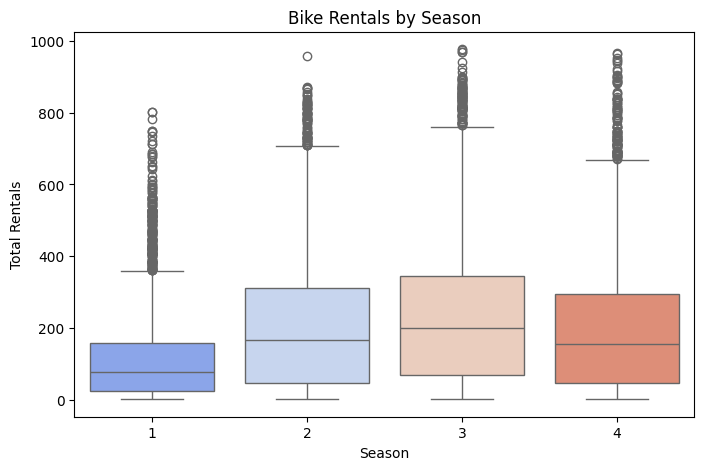

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=dataset['season'], y=dataset['cnt'], palette='coolwarm')
plt.title("Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.show()

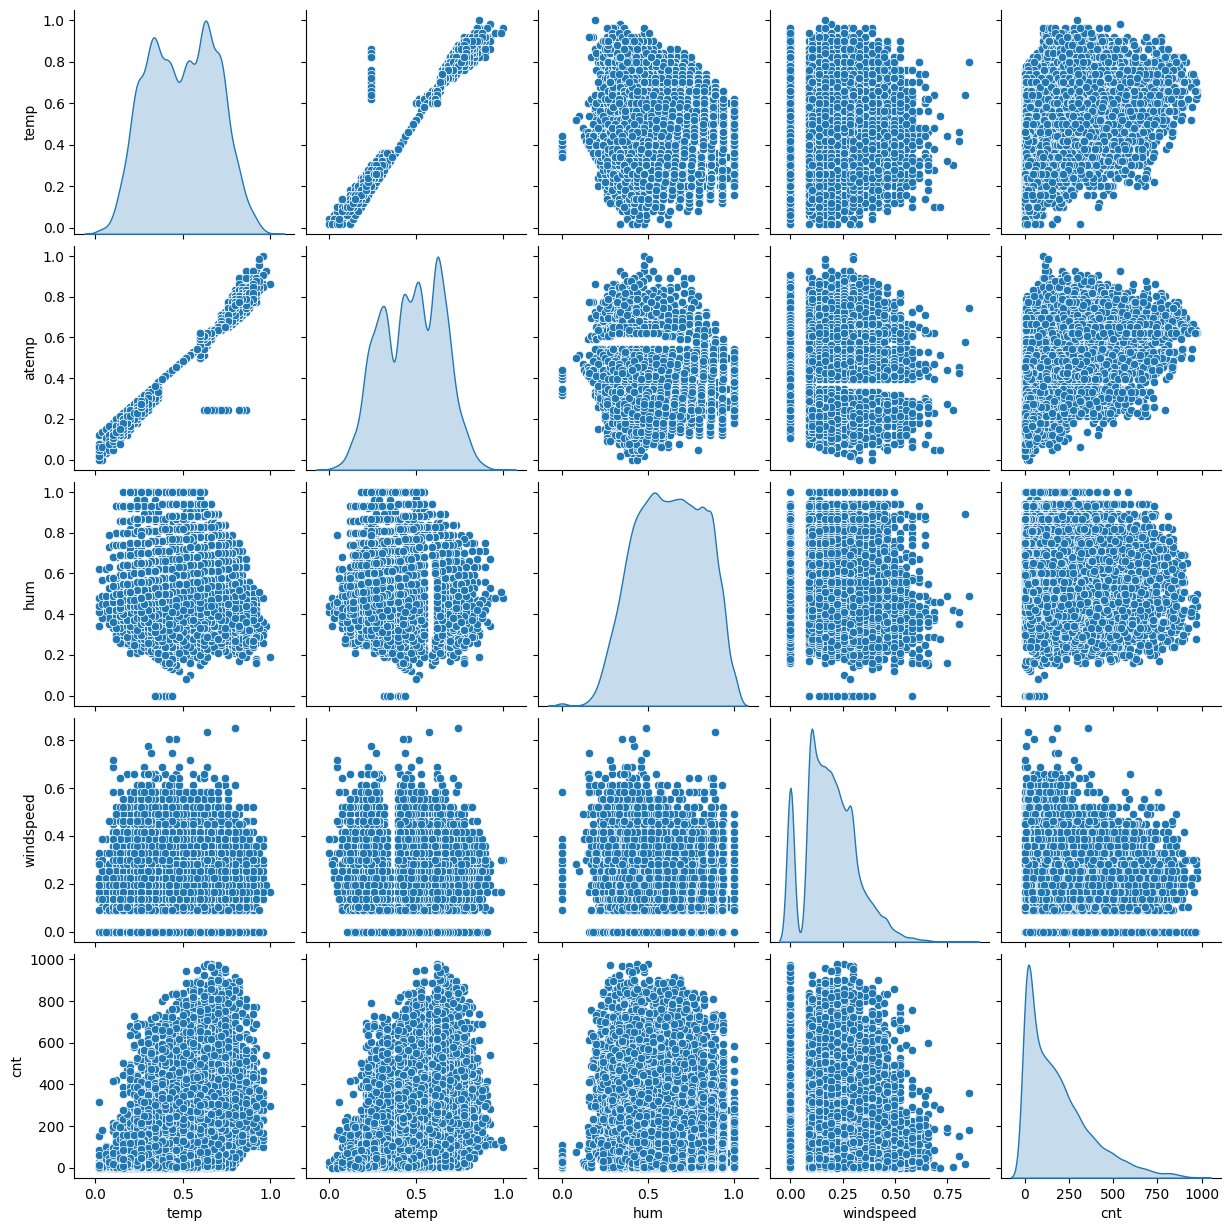

In [15]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(dataset[numerical_features], diag_kind='kde')
plt.show()

<ipython-input-16-2f03dae987ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=dataset, palette='coolwarm')


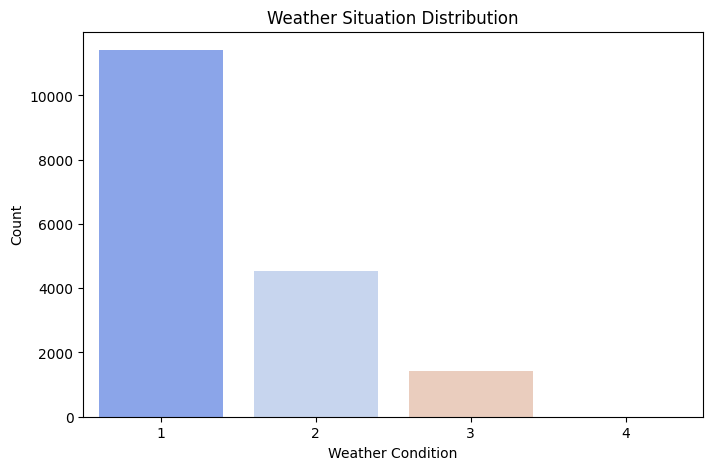

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='weathersit', data=dataset, palette='coolwarm')
plt.title("Weather Situation Distribution")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

In [17]:
X = dataset.drop(['cnt', 'instant', 'dteday', 'casual', 'registered'], axis=1)
Y = dataset['cnt']
X_scaled = StandardScaler().fit_transform(X)
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_scaled, Y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


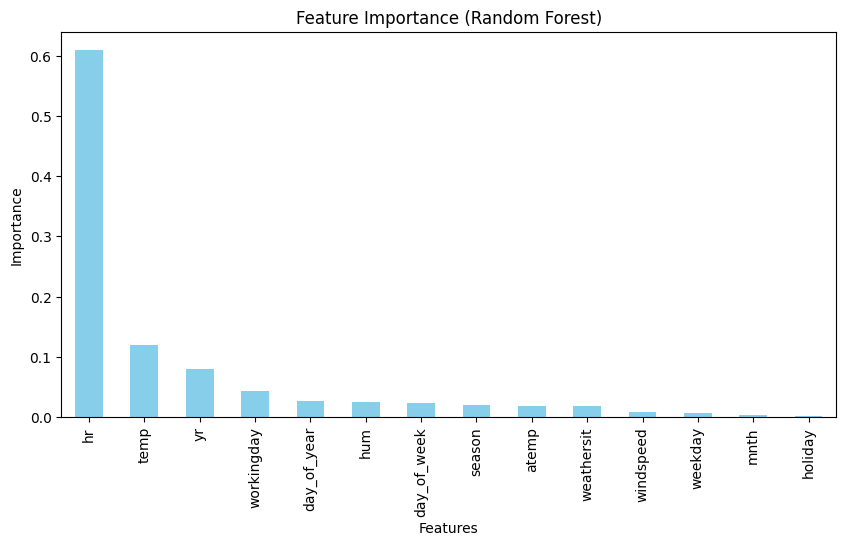

In [18]:
plt.figure(figsize=(10,5))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
